In [1]:
import pandas as pd
import seaborn as sns
#import pandas_profiling
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.feature_extraction.text as text
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
!pip install contractions
import contractions
from collections import Counter
!pip install wordcloud
from wordcloud import WordCloud
from sklearn. preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('stopwords')
import numpy as np
warnings.filterwarnings('ignore')
import gensim
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 kB 3.2 MB/s eta 0:00:00a 0:00:01


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anishchintamaneni/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anishchintamaneni/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
data = pd.read_json('data.json',lines = True)

In [31]:
data

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209522  Verizon Wireless and AT&T are already promotin...   
209523  Afterward, Azarenka, more effusive with the pr...   
209524  Leading up to Super Bowl XLVI, the most talked...   
209525  CORRECTION: An earlier version of this story i...   
209526  The five-time all-star center tore into his te...   

                     authors       date  
0       Carla K. Johnson, AP 2022-09-23  
1             Mary Papenfuss 2022-09-23  
2              Elyse Wanshel 2022-09-23  
3           Caroline Bologna 2022-09-23  
4             Nina Golgowski 2022-09-22  
...                      ...        ...  
209522      Reuters, Reuters 2012-01-28  
209523                       2012-01-28  
209524                       2012-01-28  
209525                       2012-01-28  
209526                       2012-01-28  

[209527 rows x 6 columns]

In [8]:
data['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.drop_duplicates(subset=['headline', 'short_description'], inplace = True)
data.shape

(209038, 6)

In [11]:
data.isnull().values.any()

False

Number of unique categories: 42


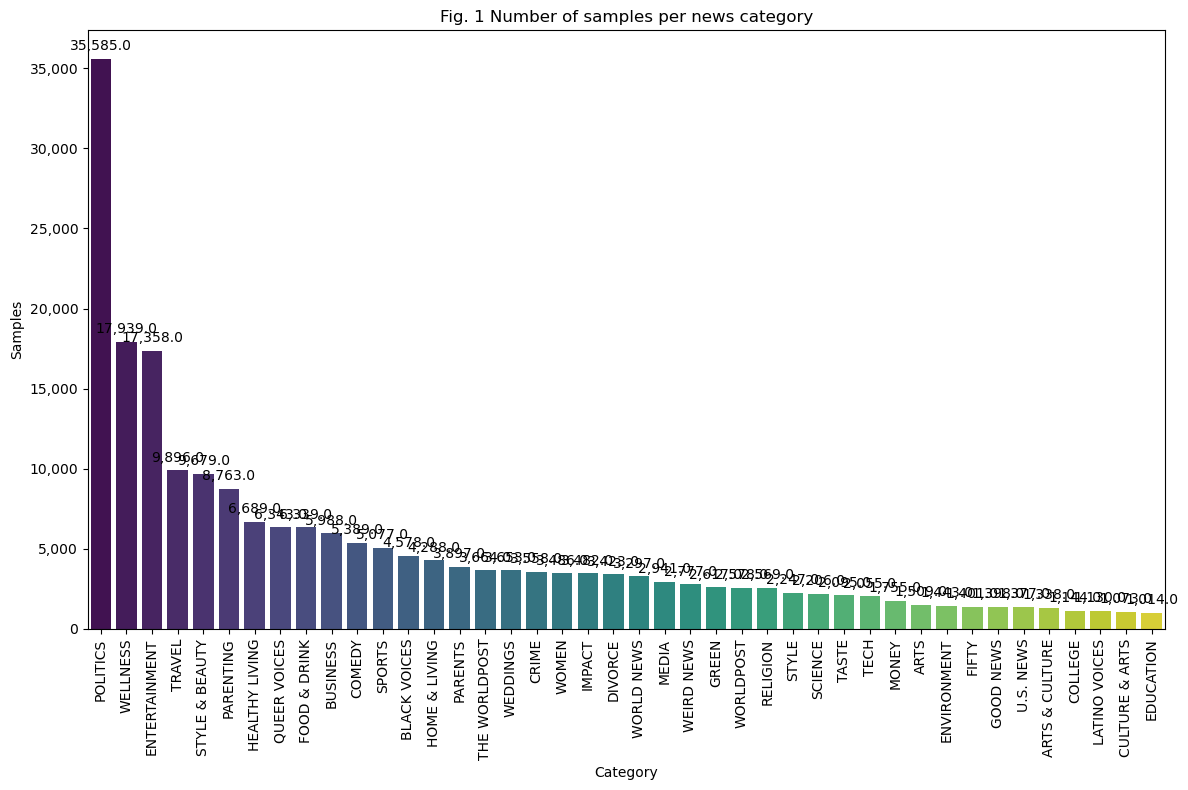

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of unique categories
num_unique_categories = data.category.nunique()
print(f'Number of unique categories: {num_unique_categories}')

# Prepare DataFrame for plotting
category_counts = data.category.value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Create the plot
plt.figure(figsize=(12, 8))
plt.title("Fig. 1 Number of samples per news category")

# Plot bar chart
ax = sns.barplot(x='Category', y='Count', data=category_counts, palette='viridis')

# Format the y-axis with thousands separator
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: "{:,}".format(int(x))))

# Set labels and rotate x-tick labels
ax.set_xlabel("Category")
ax.set_ylabel("Samples")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add value annotations to bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), ','),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # 3 points vertical offset
                textcoords = 'offset points')

plt.tight_layout()
plt.show()


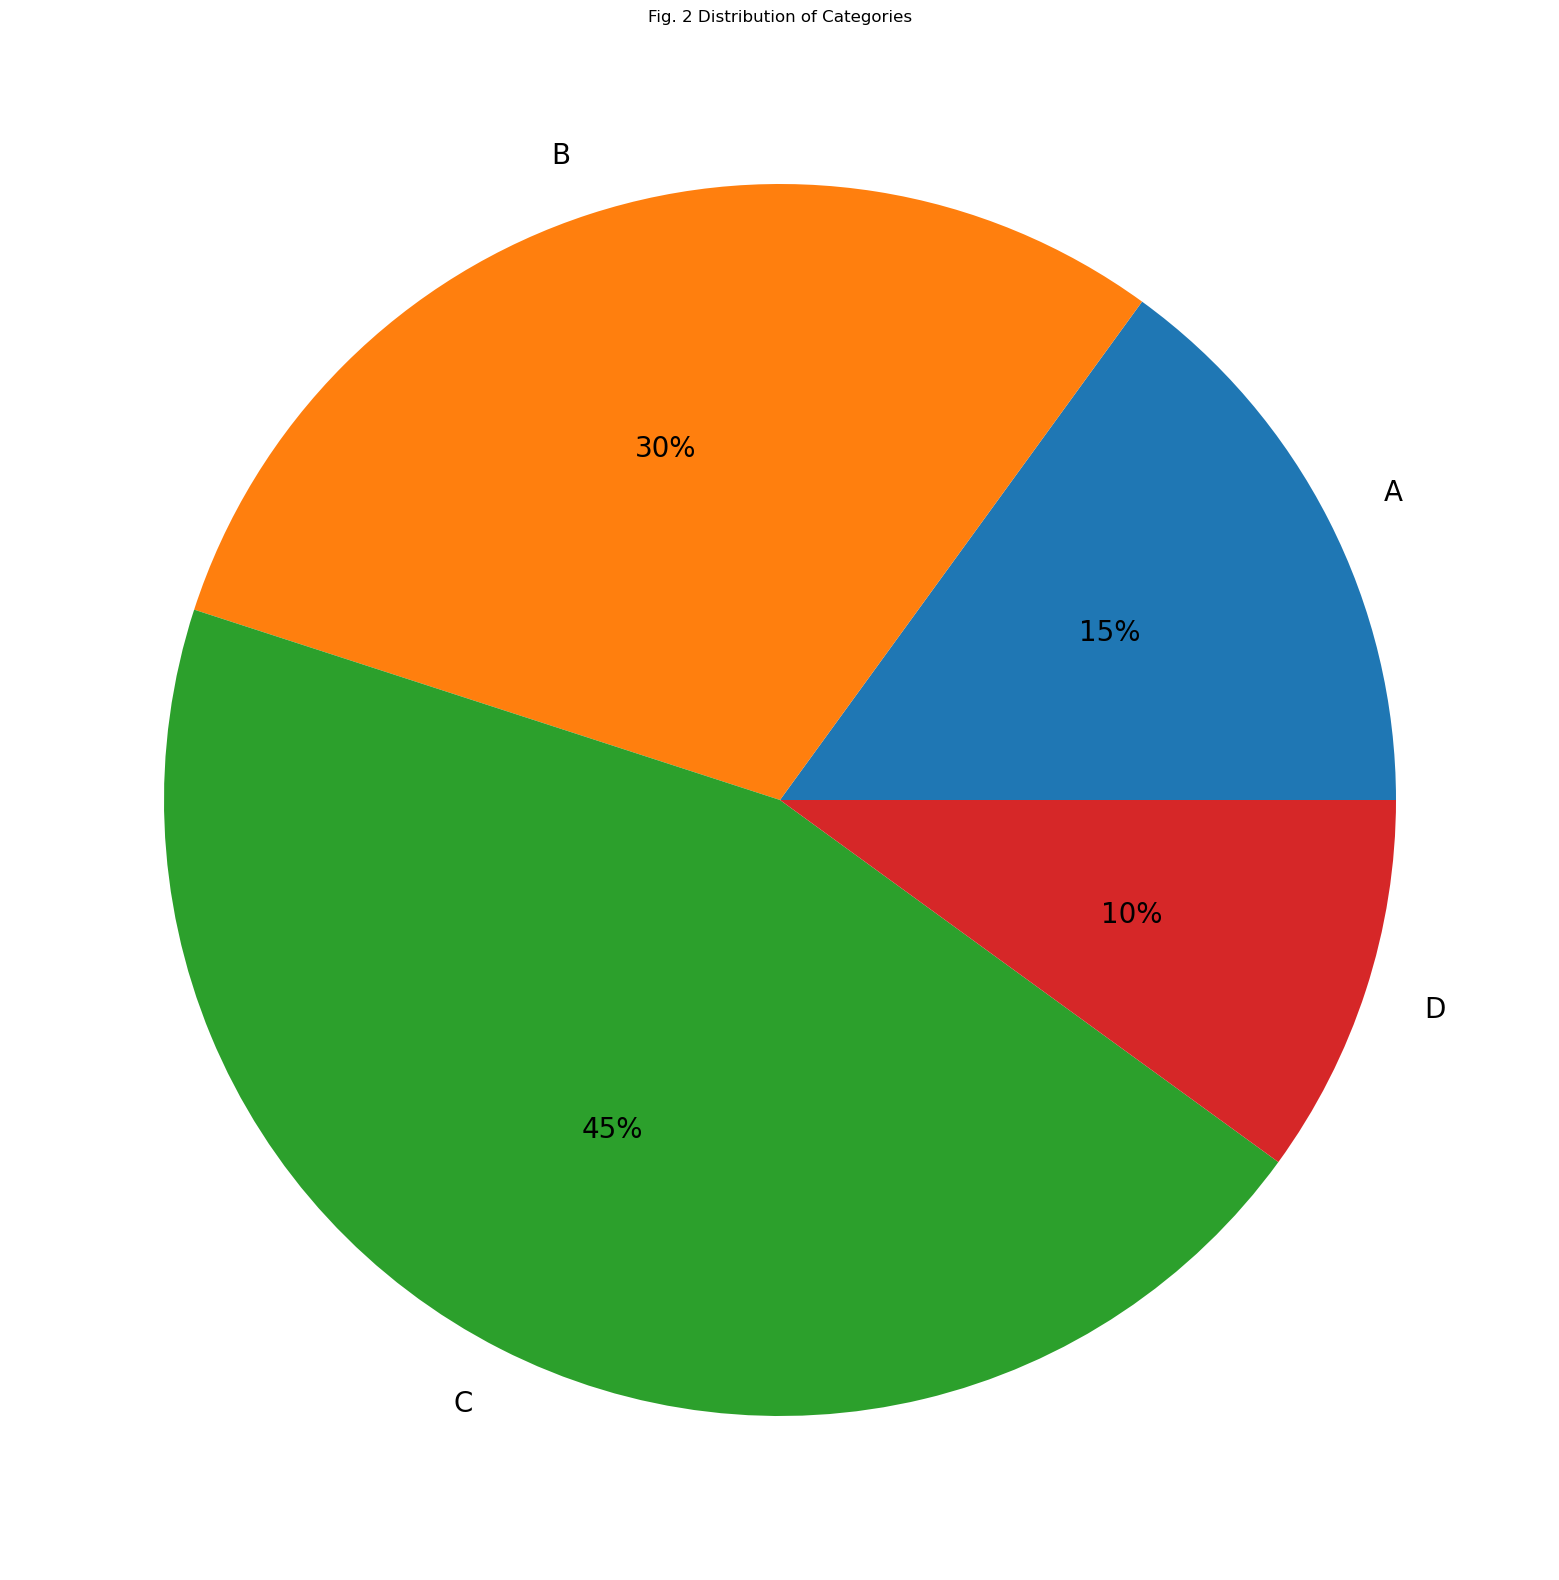

In [16]:
import matplotlib.pyplot as plt

# Create the figure with a specified size
plt.figure(figsize=(30, 20))

# Set the title of the pie chart
plt.title("Fig. 2 Distribution of Categories")

# Plot the pie chart with specified parameters
plt.pie(
    pd_df['Count'],                # Values for the pie chart
    labels=pd_df['Category'],      # Labels for each segment
    autopct='%.0f%%',              # Format of the percentage labels
    textprops={'fontsize': 20}     # Font size for the text
)

# Display the pie chart
plt.show()


In [21]:
def expand_contractions(combined_words):
    expanded_words = []   
    for word in combined_words.split():
        expanded_words.append(contractions.fix(word))  
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [22]:
stop_words = set(stopwords.words('english'))

In [23]:
def remove_stop_words(x):
    lst = [i for i in x.split() if not i in stop_words]
    data = ' '.join(lst)
    return data

In [24]:
def clean_data(data):
    data = str(data)
    data = data.lower()
    data = expand_contractions(data)
    data = re.sub('@[A-Za-z0-9_]+',' ', data)
    data = re.sub('#[A-Za-z0-9_]+',' ', data)
    data = re.sub('(http\S+)', ' ', data)
    data = re.sub('www.\S+', ' ', data)
    data = re.sub('[()!?]', ' ', data)
    data = re.sub('\[.*?\]',' ', data)
    data = re.sub('[^a-z0-9]',' ', data)
    data = re.sub(' +',' ', data)
    data = remove_stop_words(data)
    return data

In [32]:
df = data
df.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22

In [34]:
def get_word_counts(line):
    return len(str(line).split())

In [35]:
df['all_words'] = df['headline']+" "+df['short_description']

In [36]:
df['all_words'][0]

'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.'

In [39]:
#Getting the total no of word count in headlines
df['Word Count in Headlines'] = df['headline'].apply(get_word_counts)
df['Word Count in Headlines'] 


0         11
1         13
2         13
3          9
4         11
          ..
209522     8
209523    10
209524    16
209525     8
209526     9
Name: Word Count in Headlines, Length: 209527, dtype: int64

In [40]:
#Getting the total no of word count in short_description
df['Word Count in Short Description'] = df['short_description'].apply(get_word_counts)
df['Word Count in Short Description']

0         29
1         28
2         12
3         25
4         25
          ..
209522    18
209523    20
209524    24
209525    20
209526    19
Name: Word Count in Short Description, Length: 209527, dtype: int64

In [41]:
#Getting the total no of word count of headlines and short description 
df['Total_Word_Count'] = df['all_words'].apply(get_word_counts)
df['Total_Word_Count'] 

0         40
1         41
2         25
3         34
4         36
          ..
209522    26
209523    30
209524    40
209525    28
209526    28
Name: Total_Word_Count, Length: 209527, dtype: int64

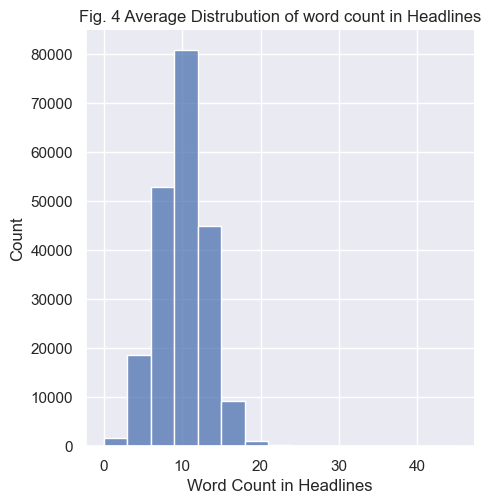

In [42]:
# Plotting Headline word count
sns.set(font_scale=1)

sns.displot(df, x="Word Count in Headlines", binwidth=3).set(
    title="Fig. 4 Average Distrubution of word count in Headlines")


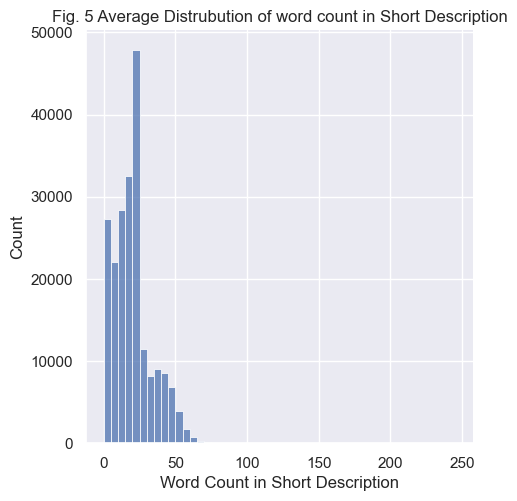

In [43]:
# Plotting Short description 
sns.set(font_scale=1)
sns.displot(df, x="Word Count in Short Description", binwidth=5).set(
    title="Fig. 5 Average Distrubution of word count in Short Description")

In [44]:
# Getting the average of all word count by category
avg_word_length_by_category = df.loc[:,['category','Total_Word_Count']].groupby('category')\
.mean().reset_index().sort_values(['Total_Word_Count'], ascending= False)
avg_word_length_by_category

category  Total_Word_Count
12           FIFTY         42.381870
38        WELLNESS         39.036556
22       PARENTING         38.456148
21           MONEY         36.659453
9        EDUCATION         36.418146
18          IMPACT         35.330080
36        WEDDINGS         34.898166
7   CULTURE & ARTS         34.781192
8          DIVORCE         34.759194
34          TRAVEL         34.757475
11     ENVIRONMENT         33.819252
30  STYLE & BEAUTY         32.168229
4          COLLEGE         31.509615
3         BUSINESS         31.252003
0             ARTS         30.310139
35       U.S. NEWS         29.987654
25    QUEER VOICES         29.784780
41       WORLDPOST         29.476541
23         PARENTS         29.453856
17   HOME & LIVING         29.373843
39           WOMEN         29.271557
15           GREEN         28.330282
16  HEALTHY LIVING         28.302062
2     BLACK VOICES         27.495309
26        RELIGION         27.256112
32            TECH         27.190114
40      WORLD NEWS         26.943316
19   LATINO VOICES         26.495575
27         SCIENCE         26.382140
24        POLITICS         26.267176
13    FOOD & DRINK         26.179495
33   THE WORLDPOST         25.239083
20           MEDIA         24.306386
6            CRIME         23.977821
28          SPORTS         23.936971
1   ARTS & CULTURE         23.277819
31           TASTE         23.275286
10   ENTERTAINMENT         23.200380
5           COMEDY         22.673148
14       GOOD NEWS         21.359800
37      WEIRD NEWS         18.601008
29           STYLE         18.417924

In [45]:
#Top 10 of the average word count by cateogry
avg_word_length_by_category_top10 = avg_word_length_by_category.head(10)
avg_word_length_by_category_top10['Total_Word_Count']=avg_word_length_by_category_top10['Total_Word_Count'].apply(np.int64)
avg_word_length_by_category_top10

category  Total_Word_Count
12           FIFTY                42
38        WELLNESS                39
22       PARENTING                38
21           MONEY                36
9        EDUCATION                36
18          IMPACT                35
36        WEDDINGS                34
7   CULTURE & ARTS                34
8          DIVORCE                34
34          TRAVEL                34

In [47]:
clean_df = df.loc[:,['all_words','category']]

In [48]:
clean_df['clean_all_words'] = clean_df['all_words'].apply(clean_data)

In [49]:
clean_df

all_words   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

                                          clean_all_words  
0       4 million americans roll sleeves omicron targe...  
1       american airlines flyer charged banned life pu...  
2       23 funniest tweets cats dogs week sept 17 23 d...  
3       funniest tweets parents week sept 17 23 accide...  
4       woman called cops black bird watcher loses law...  
...                                                   ...  
209522  rim ceo thorsten heins significant plans black...  
209523  maria sharapova stunned victoria azarenka aust...  
209524  giants patriots jets colts among improbable su...  
209525  aldon smith arrested 49ers linebacker busted d...  
209526  dwight howard rips teammates magic loss hornet...  

[209527 rows x 3 columns]

In [50]:
clean_df.loc[:,['all_words','clean_all_words']]

all_words  \
0       Over 4 Million Americans Roll Up Sleeves For O...   
1       American Airlines Flyer Charged, Banned For Li...   
2       23 Of The Funniest Tweets About Cats And Dogs ...   
3       The Funniest Tweets From Parents This Week (Se...   
4       Woman Who Called Cops On Black Bird-Watcher Lo...   
...                                                   ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...   
209523  Maria Sharapova Stunned By Victoria Azarenka I...   
209524  Giants Over Patriots, Jets Over Colts Among  M...   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...   
209526  Dwight Howard Rips Teammates After Magic Loss ...   

                                          clean_all_words  
0       4 million americans roll sleeves omicron targe...  
1       american airlines flyer charged banned life pu...  
2       23 funniest tweets cats dogs week sept 17 23 d...  
3       funniest tweets parents week sept 17 23 accide...  
4       woman called cops black bird watcher loses law...  
...                                                   ...  
209522  rim ceo thorsten heins significant plans black...  
209523  maria sharapova stunned victoria azarenka aust...  
209524  giants patriots jets colts among improbable su...  
209525  aldon smith arrested 49ers linebacker busted d...  
209526  dwight howard rips teammates magic loss hornet...  

[209527 rows x 2 columns]

In [52]:
X = clean_df['clean_all_words']
label = LabelEncoder()
Y = label.fit_transform(clean_df['category'])

In [53]:
text_all_words = " ".join(clean_all_words for clean_all_words in clean_df.clean_all_words)

In [54]:
import PIL.Image
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_all_words = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_all_words)
# saving the image
word_cloud_all_words.to_file('got.png')

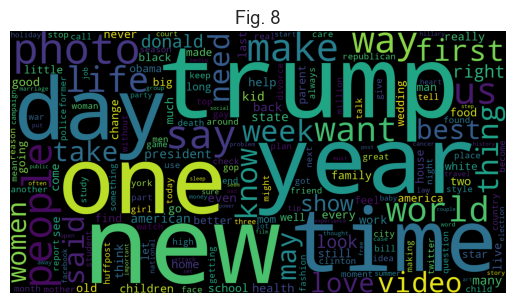

In [55]:
plt.imshow(word_cloud_all_words)
plt.axis("off")
plt.title('Fig. 8', fontsize=13)
plt.show()

In [56]:
# Word Cloud for politics
clean_politics=clean_df[clean_df["category"] == "POLITICS"]

text_politics = " ".join(clean_all_words for clean_all_words in clean_politics.clean_all_words)
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_politics = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_politics)
# saving the image
word_cloud_politics.to_file('Politics_wordCloud.png')


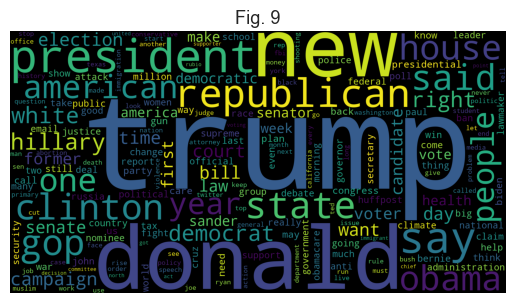

In [57]:
plt.imshow(word_cloud_politics)
plt.axis("off")
plt.title('Fig. 9', fontsize=13)
plt.show()

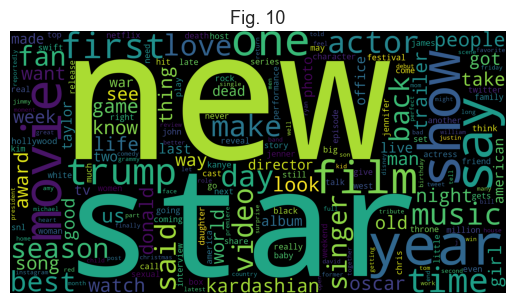

In [58]:
clean_entertainment=clean_df[clean_df["category"] == "ENTERTAINMENT"]
text_entertainment = " ".join(clean_all_words for clean_all_words in clean_entertainment.clean_all_words)
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_entertainment = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_entertainment)
# saving the image
word_cloud_entertainment.to_file('Entertainment_wordCloud.png')
plt.imshow(word_cloud_entertainment)
plt.axis("off")
plt.title('Fig. 10', fontsize=13)
plt.show()


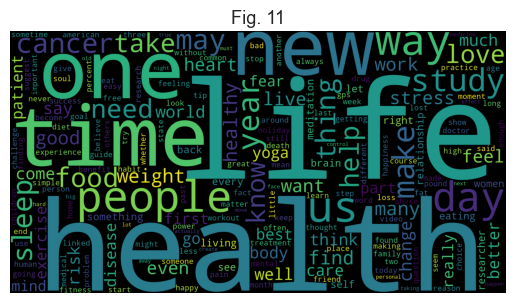

In [59]:
clean_wellness=clean_df[clean_df["category"] == "WELLNESS"]
text_wellness = " ".join(clean_all_words for clean_all_words in clean_wellness.clean_all_words)
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_wellness = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_wellness)
# saving the image
word_cloud_wellness.to_file('Wellness_wordCloud.png')
plt.imshow(word_cloud_wellness)
plt.axis("off")
plt.title('Fig. 11', fontsize=13)
plt.show()


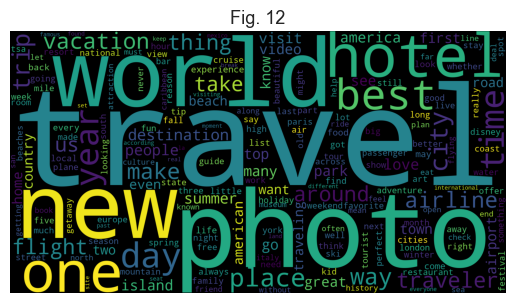

In [60]:
clean_travel=clean_df[clean_df["category"] == "TRAVEL"]
text_travel = " ".join(clean_all_words for clean_all_words in clean_travel.clean_all_words)
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_travel = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_travel)
# saving the image
word_cloud_travel.to_file('Travel_wordCloud.png')
plt.imshow(word_cloud_travel)
plt.axis("off")
plt.title('Fig. 12', fontsize=13)
plt.show()

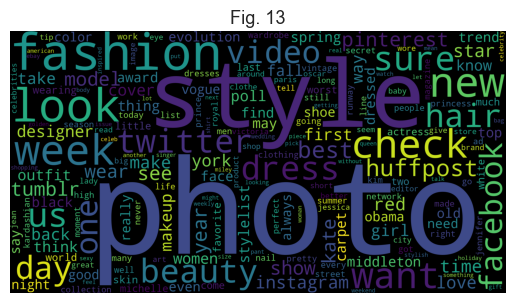

In [61]:
clean_style=clean_df[clean_df["category"] == "STYLE & BEAUTY"]
text_style = " ".join(clean_all_words for clean_all_words in clean_style.clean_all_words)
#python_mask = np.array(PIL.Image.open("E:\hp\Desktop\Final Project\pythonlogo.png"))
word_cloud_style = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_style)
# saving the image
word_cloud_style.to_file('Style_wordCloud.png')
plt.imshow(word_cloud_style)
plt.axis("off")
plt.title('Fig. 13', fontsize=13)
plt.show()

In [62]:
x_train,x_test, y_train,y_test = train_test_split(X,Y)

Accuracy: 0.4000
Classification Report:
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       382
           1    0.00000   0.00000   0.00000       313
           2    0.00000   0.00000   0.00000      1138
           3    0.80000   0.01554   0.03050      1544
           4    0.00000   0.00000   0.00000       253
           5    0.88889   0.00612   0.01215      1308
           6    0.84000   0.02352   0.04575       893
           7    0.00000   0.00000   0.00000       253
           8    0.87805   0.04114   0.07860       875
           9    0.00000   0.00000   0.00000       263
          10    0.45872   0.76346   0.57310      4308
          11    0.00000   0.00000   0.00000       375
          12    0.00000   0.00000   0.00000       310
          13    0.71739   0.45460   0.55654      1597
          14    0.00000   0.00000   0.00000       364
          15    0.00000   0.00000   0.00000       652
          16    1.00000   0.00176   0.003

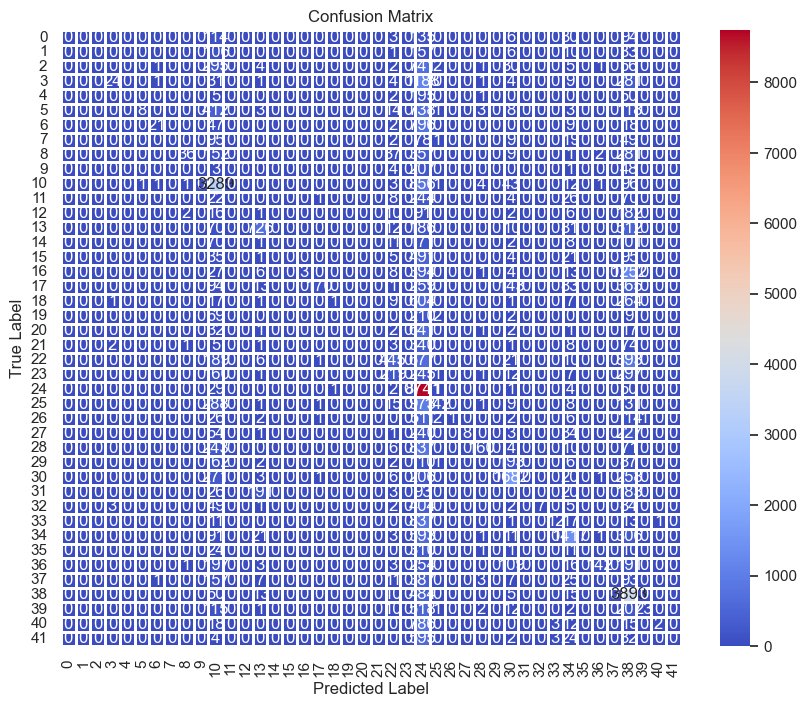

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the pipeline with TfidfVectorizer and MultinomialNB
nb_pipeline = Pipeline([
    ('vect', TfidfVectorizer()),      # Vectorize the text data
    ('clf', MultinomialNB()),         # Apply Multinomial Naive Bayes
])

# Fit the model on the training data
nb_pipeline.fit(x_train, y_train)

# Predict on the test data
y_pred = nb_pipeline.predict(x_test)

# Print accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=5))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix, 
    cmap='coolwarm', 
    annot=True, 
    linewidths=1, 
    fmt='d',
    xticklabels=nb_pipeline.classes_,
    yticklabels=nb_pipeline.classes_
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [94]:
def expand_contractions(combined_words):
    expanded_words = []   
    for word in combined_words.split():
        expanded_words.append(contractions.fix(word))  
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [95]:
stop_words = set(stopwords.words('english'))

In [96]:
def remove_stop_words(x):
    lst = [i for i in x.split() if not i in stop_words]
    data = ' '.join(lst)
    return data

In [97]:
def clean_data(data):
    data = str(data)
    data = data.lower()
    data = expand_contractions(data)
    data = re.sub('@[A-Za-z0-9_]+',' ', data)
    data = re.sub('#[A-Za-z0-9_]+',' ', data)
    data = re.sub('(http\S+)', ' ', data)
    data = re.sub('www.\S+', ' ', data)
    data = re.sub('[()!?]', ' ', data)
    data = re.sub('\[.*?\]',' ', data)
    data = re.sub('[^a-z0-9]',' ', data)
    data = re.sub(' +',' ', data)
    data = remove_stop_words(data)
    return data

In [100]:
clean_df = df.loc[:,['all_words','new_category']]

In [101]:
clean_df['clean_all_words'] = clean_df['all_words'].apply(clean_data)

In [102]:
clean_df

all_words  \
0       Over 4 Million Americans Roll Up Sleeves For O...   
1       American Airlines Flyer Charged, Banned For Li...   
2       23 Of The Funniest Tweets About Cats And Dogs ...   
3       The Funniest Tweets From Parents This Week (Se...   
4       Woman Who Called Cops On Black Bird-Watcher Lo...   
...                                                   ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...   
209523  Maria Sharapova Stunned By Victoria Azarenka I...   
209524  Giants Over Patriots, Jets Over Colts Among  M...   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...   
209526  Dwight Howard Rips Teammates After Magic Loss ...   

                   new_category  \
0                          NEWS   
1                          NEWS   
2                 ENTERTAINMENT   
3       PARENTING AND EDUCATION   
4                          NEWS   
...                         ...   
209522               TECHNOLOGY   
209523            ENTERTAINMENT   
209524            ENTERTAINMENT   
209525            ENTERTAINMENT   
209526            ENTERTAINMENT   

                                          clean_all_words  
0       4 million americans roll sleeves omicron targe...  
1       american airlines flyer charged banned life pu...  
2       23 funniest tweets cats dogs week sept 17 23 d...  
3       funniest tweets parents week sept 17 23 accide...  
4       woman called cops black bird watcher loses law...  
...                                                   ...  
209522  rim ceo thorsten heins significant plans black...  
209523  maria sharapova stunned victoria azarenka aust...  
209524  giants patriots jets colts among improbable su...  
209525  aldon smith arrested 49ers linebacker busted d...  
209526  dwight howard rips teammates magic loss hornet...  

[209038 rows x 3 columns]

In [103]:
data['category'].unique().shape

(42,)

In [104]:
new_mappings = {tuple(['U.S. NEWS', 'WORLD NEWS',  'GOOD NEWS' , 'THE WORLDPOST','WORLDPOST']): 'NEWS',
                  tuple(['CULTURE & ARTS', 'TRAVEL','ARTS & CULTURE','ARTS']): 'TRAVEL AND ARTS',
                                                  tuple(['WELLNESS','STYLE & BEAUTY','HOME & LIVING','HEALTHY LIVING','STYLE']): 'LIFESTYLE',
                                                 tuple(['TASTE','FOOD & DRINK']): 'FOOD',
                                                  tuple(['QUEER VOICES', 'BLACK VOICES','LATINO VOICES','WOMEN']): 'DIVERSITY',
                                                  tuple(['COMEDY','SPORTS','ENTERTAINMENT','WEIRD NEWS']): 'ENTERTAINMENT',
                                                  tuple(['BUSINESS','MONEY']): 'BUSINESS',
                                                  tuple(['COLLEGE','PARENTING','EDUCATION','PARENTS']): 'PARENTING AND EDUCATION',
                                                  tuple(['CRIME','FIFTY','IMPACT','WEDDINGS','DIVORCE','RELIGION']): 'MISCELLANEOUS',
                                                tuple(['POLITICS','MEDIA']): 'POLITICS',
                                                 tuple(['ENVIRONMENT','GREEN']): 'ENVIRONMENT',
                                                 tuple(['TECH','SCIENCE']): 'TECHNOLOGY'
                }

In [105]:
new_mapping_dict = {}
for key, value in new_mappings.items():
    for one_key in key:
        new_mapping_dict[one_key] = value

In [106]:
data['new_category'] = data['category'].replace(new_mapping_dict)
data.loc[:,['category','new_category']]

category             new_category
0       U.S. NEWS                     NEWS
1       U.S. NEWS                     NEWS
2          COMEDY            ENTERTAINMENT
3       PARENTING  PARENTING AND EDUCATION
4       U.S. NEWS                     NEWS
...           ...                      ...
209522       TECH               TECHNOLOGY
209523     SPORTS            ENTERTAINMENT
209524     SPORTS            ENTERTAINMENT
209525     SPORTS            ENTERTAINMENT
209526     SPORTS            ENTERTAINMENT

[209038 rows x 2 columns]

In [107]:
data.drop_duplicates(inplace = True)
data.drop_duplicates(subset=['headline', 'short_description'], inplace = True)
data.shape

(209038, 11)

In [108]:
data.isnull().values.any()

False

In [109]:
def get_word_counts(line):
    return len(str(line).split())

In [110]:
df = data
df.head()

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date                                          all_words  \
0 2022-09-23  Over 4 Million Americans Roll Up Sleeves For O...   
1 2022-09-23  American Airlines Flyer Charged, Banned For Li...   
2 2022-09-23  23 Of The Funniest Tweets About Cats And Dogs ...   
3 2022-09-23  The Funniest Tweets From Parents This Week (Se...   
4 2022-09-22  Woman Who Called Cops On Black Bird-Watcher Lo...   

   Word Count in Headlines  Word Count in Short Description  Total_Word_Count  \
0                       11                               29                40   
1                       13                               28                41   
2                       13                               12                25   
3                        9                               25                34   
4                       11                               25                36   

              new_category  
0                     NEWS  
1                     NEWS  
2            ENTERTAINMENT  
3  PARENTING AND EDUCATION  
4                     NEWS

In [111]:
X = clean_df['clean_all_words']
label = LabelEncoder()
Y = label.fit_transform(clean_df['new_category'])

In [112]:
print(clean_df.columns)


Index(['all_words', 'new_category', 'clean_all_words'], dtype='object')


In [114]:
print(clean_df.head())


                                           all_words             new_category  \
0  Over 4 Million Americans Roll Up Sleeves For O...                     NEWS   
1  American Airlines Flyer Charged, Banned For Li...                     NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...            ENTERTAINMENT   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING AND EDUCATION   
4  Woman Who Called Cops On Black Bird-Watcher Lo...                     NEWS   

                                     clean_all_words  
0  4 million americans roll sleeves omicron targe...  
1  american airlines flyer charged banned life pu...  
2  23 funniest tweets cats dogs week sept 17 23 d...  
3  funniest tweets parents week sept 17 23 accide...  
4  woman called cops black bird watcher loses law...  


In [115]:
text_all_words = " ".join(clean_all_words for clean_all_words in clean_df.clean_all_words)

In [116]:

word_cloud_all_words = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_all_words)
# saving the image
word_cloud_all_words.to_file('got.png')

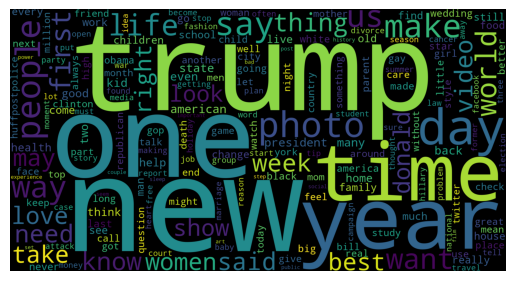

In [117]:
plt.imshow(word_cloud_all_words)
plt.axis("off")
plt.show()

In [118]:
# Word Cloud for politics
clean_politics=clean_df[clean_df["new_category"] == "POLITICS"]

text_politics = " ".join(clean_all_words for clean_all_words in clean_politics.clean_all_words)
word_cloud_politics = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_politics)
# saving the image
word_cloud_politics.to_file('Politics_wordCloud.png')

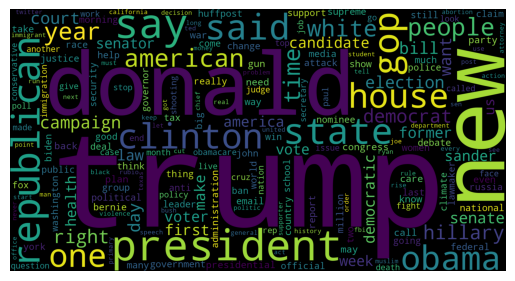

In [119]:
plt.imshow(word_cloud_politics)
plt.axis("off")
plt.show()

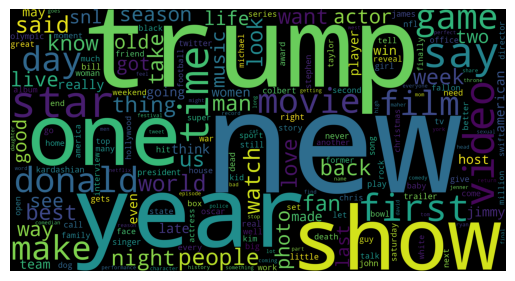

In [120]:
clean_entertainment=clean_df[clean_df["new_category"] == "ENTERTAINMENT"]
text_entertainment = " ".join(clean_all_words for clean_all_words in clean_entertainment.clean_all_words)
word_cloud_entertainment = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_entertainment)
# saving the image
word_cloud_entertainment.to_file('Entertainment_wordCloud.png')
plt.imshow(word_cloud_entertainment)
plt.axis("off")
plt.show()

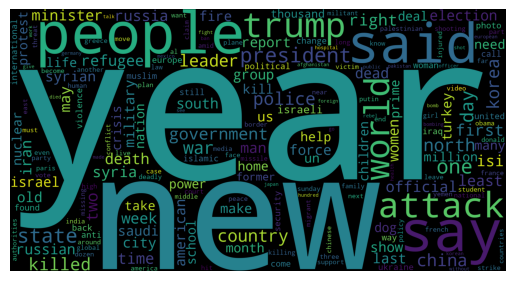

In [121]:
clean_news=clean_df[clean_df["new_category"] == "NEWS"]
text_news = " ".join(clean_all_words for clean_all_words in clean_news.clean_all_words)
word_cloud_news = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_news)
# saving the image
word_cloud_news.to_file('News_wordCloud.png')
plt.imshow(word_cloud_news)
plt.axis("off")
plt.show()

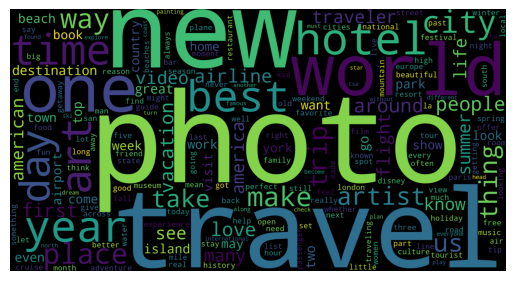

In [122]:
clean_travel_and_arts=clean_df[clean_df["new_category"] == "TRAVEL AND ARTS"]
text_travel_and_arts = " ".join(clean_all_words for clean_all_words in clean_travel_and_arts.clean_all_words)
word_cloud_travel_and_arts = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_travel_and_arts)
# saving the image
word_cloud_travel_and_arts.to_file('travel_and_arts_wordCloud.png')
plt.imshow(word_cloud_travel_and_arts)
plt.axis("off")
plt.show()

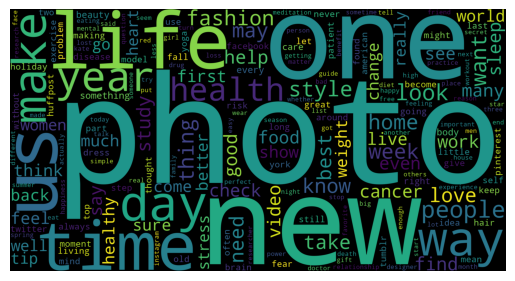

In [123]:
clean_lifestyle=clean_df[clean_df["new_category"] == "LIFESTYLE"]
text_lifestyle = " ".join(clean_all_words for clean_all_words in clean_lifestyle.clean_all_words)
word_cloud_lifestyle = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_lifestyle)
# saving the image
word_cloud_lifestyle.to_file('Lifestyle_wordCloud.png')
plt.imshow(word_cloud_lifestyle)
plt.axis("off")
plt.show()

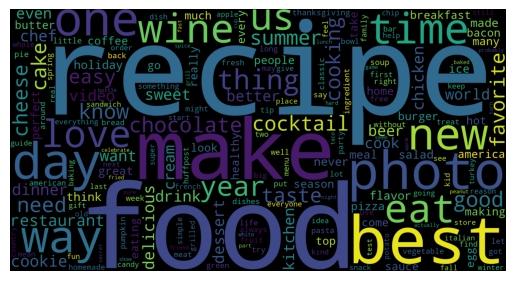

In [124]:
clean_food=clean_df[clean_df["new_category"] == "FOOD"]
text_food = " ".join(clean_all_words for clean_all_words in clean_food.clean_all_words)
word_cloud_food = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_food)
# saving the image
word_cloud_food.to_file('Food_wordCloud.png')
plt.imshow(word_cloud_food)
plt.axis("off")
plt.show()

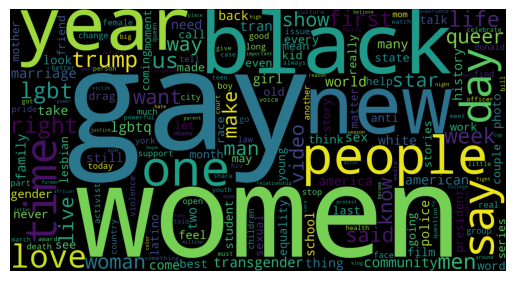

In [125]:
clean_diversity=clean_df[clean_df["new_category"] == "DIVERSITY"]
text_diversity = " ".join(clean_all_words for clean_all_words in clean_diversity.clean_all_words)
word_cloud_diversity = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_diversity)
# saving the image
word_cloud_diversity.to_file('Diversity_wordCloud.png')
plt.imshow(word_cloud_diversity)
plt.axis("off")
plt.show()

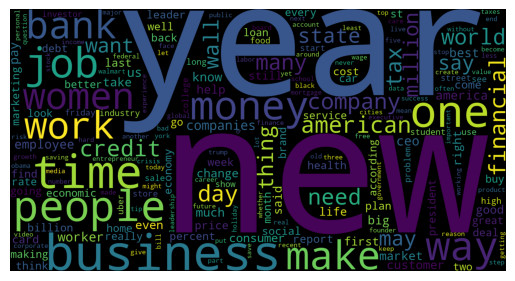

In [126]:
clean_business=clean_df[clean_df["new_category"] == "BUSINESS"]
text_business = " ".join(clean_all_words for clean_all_words in clean_business.clean_all_words)
word_cloud_business = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_business)
# saving the image
word_cloud_business.to_file('Business_wordCloud.png')
plt.imshow(word_cloud_business)
plt.axis("off")
plt.show()

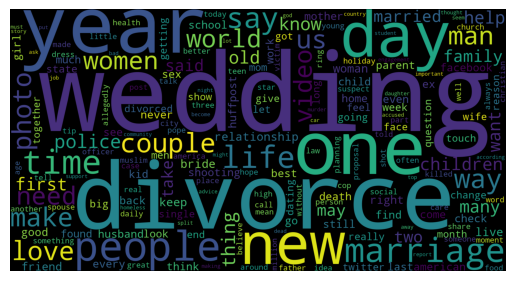

In [127]:
clean_miscellaneous=clean_df[clean_df["new_category"] == "MISCELLANEOUS"]
text_miscellaneous = " ".join(clean_all_words for clean_all_words in clean_miscellaneous.clean_all_words)
word_cloud_miscellaneous = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_miscellaneous)
# saving the image
word_cloud_miscellaneous.to_file('Miscellaneous_wordCloud.png')
plt.imshow(word_cloud_miscellaneous)
plt.axis("off")
plt.show()

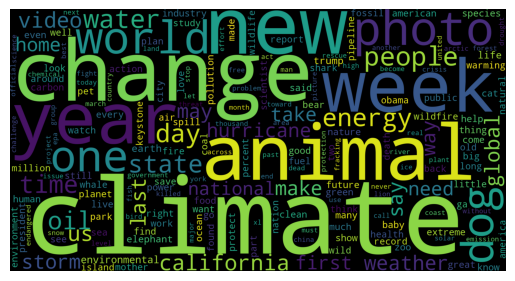

In [128]:
clean_environment=clean_df[clean_df["new_category"] == "ENVIRONMENT"]
text_environment = " ".join(clean_all_words for clean_all_words in clean_environment.clean_all_words)
word_cloud_environment = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_environment)
# saving the image
word_cloud_environment.to_file('Environment_wordCloud.png')
plt.imshow(word_cloud_environment)
plt.axis("off")
plt.show()

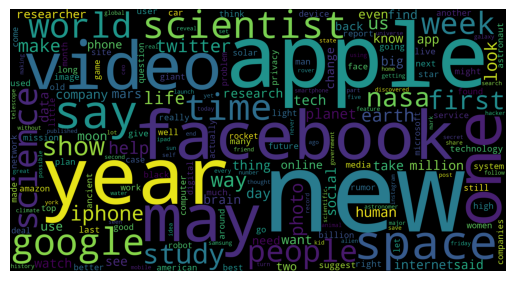

In [129]:
clean_technology=clean_df[clean_df["new_category"] == "TECHNOLOGY"]
text_technology = " ".join(clean_all_words for clean_all_words in clean_technology.clean_all_words)
word_cloud_technology = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text_technology)
# saving the image
word_cloud_technology.to_file('Technology_wordCloud.png')
plt.imshow(word_cloud_technology)
plt.axis("off")
plt.show()

In [130]:
x_train,x_test, y_train,y_test = train_test_split(X,Y)

In [131]:
#MultinominalNB
from sklearn.naive_bayes import MultinomialNB

nb = Pipeline([ 
                ('vect', TfidfVectorizer()),
                ('clf', MultinomialNB()),
               ])
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.5563337160352085
              precision    recall  f1-score   support

           0    0.90741   0.02519   0.04902      1945
           1    0.84848   0.14418   0.24648      3884
           2    0.61949   0.73030   0.67034      7653
           3    1.00000   0.00204   0.00407       982
           4    0.91159   0.29586   0.44673      2126
           5    0.45933   0.93284   0.61556     10303
           6    0.77920   0.26882   0.39974      4516
           7    0.83015   0.24421   0.37740      3022
           8    0.77267   0.17355   0.28343      3682
           9    0.54771   0.92629   0.68838      9673
          10    1.00000   0.01465   0.02887      1024
          11    0.84762   0.30957   0.45350      3450

    accuracy                        0.55633     52260
   macro avg    0.79364   0.33896   0.35529     52260
weighted avg    0.68069   0.55633   0.49217     52260



In [132]:
# #Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', TfidfVectorizer()),
                 ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                ])
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.6879066207424417
              precision    recall  f1-score   support

           0    0.60751   0.51568   0.55784      1945
           1    0.59813   0.49356   0.54084      3884
           2    0.66993   0.73409   0.70054      7653
           3    0.51864   0.46741   0.49170       982
           4    0.79224   0.73001   0.75985      2126
           5    0.72574   0.80287   0.76236     10303
           6    0.61352   0.57263   0.59237      4516
           7    0.64203   0.57214   0.60507      3022
           8    0.65471   0.61950   0.63662      3682
           9    0.75766   0.79541   0.77607      9673
          10    0.54566   0.47266   0.50654      1024
          11    0.70467   0.68261   0.69346      3450

    accuracy                        0.68791     52260
   macro avg    0.65254   0.62155   0.63527     52260
weighted avg    0.68394   0.68791   0.68438     52260



In [133]:
# SGDClassifier
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', TfidfVectorizer()),
                 ('clf',  SGDClassifier(loss='hinge', penalty='l2')),
                ])
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.6680826636050516
              precision    recall  f1-score   support

           0    0.67884   0.32494   0.43950      1945
           1    0.70617   0.37745   0.49195      3884
           2    0.65859   0.71410   0.68522      7653
           3    0.60892   0.23625   0.34043       982
           4    0.72937   0.71496   0.72209      2126
           5    0.64507   0.86276   0.73820     10303
           6    0.70800   0.44885   0.54940      4516
           7    0.65421   0.50397   0.56935      3022
           8    0.61437   0.65508   0.63407      3682
           9    0.68881   0.86933   0.76861      9673
          10    0.67079   0.26465   0.37955      1024
          11    0.69373   0.59942   0.64313      3450

    accuracy                        0.66808     52260
   macro avg    0.67140   0.54765   0.58012     52260
weighted avg    0.67121   0.66808   0.65180     52260



In [135]:
import pandas as pd
import seaborn as sns
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
#import pandas_profiling
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.feature_extraction.text as text
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
!pip install contractions
import contractions
from collections import Counter
!pip install wordcloud
from wordcloud import WordCloud
from sklearn. preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('stopwords')
import numpy as np
warnings.filterwarnings('ignore')
import gensim
nltk.download('punkt')

python(29551) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(29552) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anishchintamaneni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anishchintamaneni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)


[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 4.2% 70.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===-----------------------------------------------] 7.0% 116.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.7% 162.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.5% 208.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.3% 254.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.0% 283.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 18.9% 314.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.1% 350.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 23.0% 383.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.1% 417.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.5% 457.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.1% 499.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.8% 544.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.5% 590.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 38.2% 634.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 40.8% 678.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.4% 722.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 46.2% 768.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 48.9% 813.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.6% 858.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.3% 903.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.5% 922.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.6% 941.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 58.0% 963.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.0% 981.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.2% 1001.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.3% 1018.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 62.6% 1041.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 64.0% 1064.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================------------------] 65.3% 1085.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 66.6% 1107.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.9% 1129.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================----------------] 69.3% 1151.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 70.6% 1173.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 72.0% 1196.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.3% 1219.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.7% 1241.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.8% 1260.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 76.8% 1277.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.2% 1300.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 79.3% 1318.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 80.8% 1343.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.9% 1361.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.3% 1385.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 84.4% 1403.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.9% 1427.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.0% 1446.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================================------] 88.5% 1471.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================================------] 89.6% 1489.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.1% 1514.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================================----] 92.2% 1532.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.7% 1557.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.9% 1577.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 96.4% 1603.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[================================================--] 97.6% 1622.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 99.1% 1647.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded
/Users/anishchintamaneni/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [143]:
import gensim.downloader as api

# Download and load the model
model = api.load("word2vec-google-news-300")

# Use the model for various tasks, for example, finding most similar words
similar_words = model.most_similar("delicious")
print(similar_words)



[('scrumptious', 0.8770449757575989), ('tasty', 0.8730389475822449), ('delectable', 0.8363205194473267), ('yummy', 0.8119936585426331), ('flavorful', 0.7428319454193115), ('sinfully_delicious', 0.7334189414978027), ('scrumptious_desserts', 0.7285337448120117), ('delish', 0.7256091833114624), ('savory', 0.7186154127120972), ('decadent_dessert', 0.7114437818527222)]


In [145]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model
w2v_model = api.load("word2vec-google-news-300")

# Calculate and print the similarity between pairs of words
similarity_scientist_researcher = w2v_model.similarity('Scientist', 'Researcher')
similarity_lake_river = w2v_model.similarity('Lake', 'River')
similarity_lake_iphone = w2v_model.similarity('Lake', 'Iphone')

print(f"Similarity between 'Scientist' and 'Researcher': {similarity_scientist_researcher}")
print(f"Similarity between 'Lake' and 'River': {similarity_lake_river}")
print(f"Similarity between 'Lake' and 'Iphone': {similarity_lake_iphone}")


Similarity between 'Scientist' and 'Researcher': 0.6589007377624512
Similarity between 'Lake' and 'River': 0.6395972371101379
Similarity between 'Lake' and 'Iphone': -0.052412066608667374


In [146]:
all_sentences = clean_df['clean_all_words'].tolist()

In [147]:
len(w2v_model.get_vector('tiger'))

300

In [148]:
w2v_model.get_vector('tiger')

array([-6.83593750e-02,  1.82617188e-01, -1.77734375e-01,  1.66015625e-01,
        1.46484375e-01,  2.53906250e-02,  5.00488281e-02, -3.51562500e-02,
        2.53906250e-01,  2.22778320e-03, -3.26156616e-04, -2.05078125e-01,
       -2.98828125e-01, -3.71093750e-01, -4.45312500e-01, -2.08007812e-01,
       -1.89453125e-01, -5.72204590e-04, -2.45117188e-01, -2.08984375e-01,
        2.51953125e-01, -3.73046875e-01,  1.91406250e-01, -2.07519531e-02,
       -2.96875000e-01,  1.24023438e-01, -4.60937500e-01,  1.42578125e-01,
        7.14843750e-01,  1.18652344e-01, -1.47460938e-01, -1.15234375e-01,
       -9.03320312e-02, -8.49609375e-02, -3.14453125e-01,  1.54296875e-01,
       -1.97265625e-01,  2.89062500e-01,  3.26171875e-01,  2.79296875e-01,
       -2.13623047e-02, -7.76367188e-02,  1.29882812e-01,  1.79687500e-01,
        2.85156250e-01, -2.45117188e-01, -7.22656250e-02, -1.08398438e-01,
        3.96484375e-01,  2.75390625e-01, -2.94921875e-01,  2.87109375e-01,
       -9.33837891e-03, -

In [149]:
vocab = set(w2v_model.key_to_index.keys())

In [150]:
'tiger' in vocab

True

In [151]:
def get_avg_w2v(sentence):
    current_vect = np.zeros(300)
    cnt_of_words = 0
    for word in sentence.split():
        if word in vocab:
            vector = w2v_model.get_vector(word)
            current_vect += vector
            cnt_of_words += 1
    current_vect /= cnt_of_words
    return current_vect

In [152]:
clean_df['avg_w2v'] = clean_df['clean_all_words'].apply(get_avg_w2v)


In [155]:
corpus = clean_df['clean_all_words'].tolist()
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

In [163]:
# Get feature names and IDF values
get_feature_names = tfidf_vectorizer.get_feature_names_out()
idf_values = tfidf_vectorizer.idf_

# Create a dictionary mapping feature names to their IDF values
dic = dict(zip(get_feature_names, idf_values))

print(dic)


{'00': 9.561396662295675, '000': 5.583585916329526, '0000': 12.557128935849667, '00064': 12.557128935849667, '000th': 12.151663827741501, '000x': 12.557128935849667, '001': 12.151663827741501, '0010': 12.557128935849667, '0011': 12.557128935849667, '002': 11.863981755289721, '004': 12.557128935849667, '006': 12.557128935849667, '007': 10.30583713724317, '009': 12.557128935849667, '00am': 11.863981755289721, '00pm': 11.64083820397551, '00s': 11.458516647181556, '01': 10.30583713724317, '010': 12.557128935849667, '01001100': 12.557128935849667, '01100101': 12.557128935849667, '01101111': 12.557128935849667, '01110110': 12.557128935849667, '012': 12.557128935849667, '013': 12.557128935849667, '014': 11.863981755289721, '015': 12.151663827741501, '019': 12.151663827741501, '02': 10.359904358513447, '0235723': 12.557128935849667, '025': 12.557128935849667, '027': 12.557128935849667, '028': 12.557128935849667, '029': 12.557128935849667, '02ag': 12.557128935849667, '02pm': 12.557128935849667,

In [165]:
dic = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))

In [166]:
corpus = clean_df['clean_all_words'].tolist()
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

In [168]:
dic = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))

In [169]:
def get_tf_idf_w2v(sentence):
    current_vect = np.zeros(300)
    sum_of_weights = 0
    for word in sentence.split():
        try:
            vector = w2v_model.get_vector(word)
            tf_idf = dic[word]
            current_vect += (vector*tf_idf) 
            sum_of_weights += tf_idf
        except:
            continue
    if sum_of_weights > 0:
        return (current_vect/sum_of_weights)
    else:
        return np.zeros(300)
    
    

In [170]:
clean_df['tf_idf_w2v'] = clean_df['clean_all_words'].apply(get_tf_idf_w2v)

In [171]:
clean_df.shape

(209038, 5)

In [174]:
clean_df = clean_df.dropna()

In [175]:
def check_array(array):
    return np.any(np.isnan(array))

In [176]:
clean_df['bool_avg'] = clean_df['avg_w2v'].apply(check_array)

In [177]:
clean_df.loc[clean_df.bool_avg, :]

all_words     new_category  \
63714                                      "ManScraping"     ENTERTAINMENT   
66203                                         Wafflewich              FOOD   
76593                                    The Opinionator     ENTERTAINMENT   
86508                                              Once.     ENTERTAINMENT   
90944                                                             POLITICS   
96824                                       WHAAAAAAAT!?     ENTERTAINMENT   
98808                                        No, No, No!     ENTERTAINMENT   
101055                                 WHO Are You Now ?     ENTERTAINMENT   
104914                                     WHERE'S VLAD?              NEWS   
105315                                          #Anxiety         LIFESTYLE   
110960                                     WTFark, 2014!     ENTERTAINMENT   
113992  Ένας νεκρός σε συγκρούσεις μεταξύ διαδηλωτών κ...      ENVIRONMENT   
114414                                         As We Are         LIFESTYLE   
115562                                The 80/20... What?         LIFESTYLE   
120484  Karoline Hjorth and Riitta Ikonen on the Image...  TRAVEL AND ARTS   
125181                                             50/50     MISCELLANEOUS   
127231                                              Over     MISCELLANEOUS   
128827        They're Against It. (They're Against Him.)          POLITICS   
129600                                     Because I Can         LIFESTYLE   
129862                                          Attendez   TRAVEL AND ARTS   

                                clean_all_words  \
63714                               manscraping   
66203                                wafflewich   
76593                               opinionator   
86508                                             
90944                                             
96824                                whaaaaaaat   
98808                                             
101055                                            
104914                                     vlad   
105315                                            
110960                              wtfark 2014   
113992                                            
114414                                            
115562                                    80 20   
120484  karoline hjorth riitta ikonen imageblog   
125181                                    50 50   
127231                                            
128827                                            
129600                                            
129862                                 attendez   

                                                  avg_w2v  \
63714   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
66203   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
76593   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
86508   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
90944   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
96824   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
98808   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
101055  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
104914  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
105315  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
110960  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
113992  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
114414  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
115562  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
120484  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
125181  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
127231  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
128827  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
129600  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
129862  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                                               tf_idf_w

In [178]:
label = LabelEncoder()
clean_df['new_category'] = label.fit_transform(clean_df['new_category'])
clean_df = clean_df.loc[~clean_df.bool_avg,['new_category','avg_w2v','tf_idf_w2v']]


In [179]:
X = clean_df['avg_w2v'].to_list()
Y = clean_df['new_category'].to_list()

In [180]:
x_train,x_test, y_train,y_test = train_test_split(X,Y)

In [181]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.6374126877810736
              precision    recall  f1-score   support

           0    0.53695   0.43075   0.47802      1906
           1    0.55870   0.38715   0.45737      3921
           2    0.59800   0.66654   0.63041      7635
           3    0.54113   0.39717   0.45811      1060
           4    0.77173   0.72355   0.74686      2098
           5    0.64785   0.78684   0.71062     10110
           6    0.57662   0.46233   0.51319      4566
           7    0.61065   0.48635   0.54146      3041
           8    0.62742   0.60207   0.61449      3762
           9    0.70529   0.78888   0.74475      9644
          10    0.56753   0.38447   0.45840      1082
          11    0.64592   0.61429   0.62971      3430

    accuracy                        0.63741     52255
   macro avg    0.61565   0.56087   0.58195     52255
weighted avg    0.63159   0.63741   0.62949     52255



In [182]:
from sklearn.linear_model import SGDClassifier
sgd =  SGDClassifier(loss='hinge', penalty='l2')
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.6214333556597454
              precision    recall  f1-score   support

           0    0.53956   0.25761   0.34872      1906
           1    0.57892   0.27876   0.37631      3921
           2    0.58725   0.66339   0.62300      7635
           3    0.33046   0.18113   0.23400      1060
           4    0.71842   0.78074   0.74829      2098
           5    0.63263   0.80208   0.70734     10110
           6    0.61926   0.40429   0.48920      4566
           7    0.56011   0.48570   0.52025      3041
           8    0.59249   0.60367   0.59803      3762
           9    0.68065   0.81595   0.74218      9644
          10    0.44784   0.29760   0.35758      1082
          11    0.61368   0.61224   0.61296      3430

    accuracy                        0.62143     52255
   macro avg    0.57510   0.51526   0.52982     52255
weighted avg    0.61140   0.62143   0.60432     52255



In [183]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(x_train,y_train) 
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.6214333556597454
              precision    recall  f1-score   support

           0    0.53956   0.25761   0.34872      1906
           1    0.57892   0.27876   0.37631      3921
           2    0.58725   0.66339   0.62300      7635
           3    0.33046   0.18113   0.23400      1060
           4    0.71842   0.78074   0.74829      2098
           5    0.63263   0.80208   0.70734     10110
           6    0.61926   0.40429   0.48920      4566
           7    0.56011   0.48570   0.52025      3041
           8    0.59249   0.60367   0.59803      3762
           9    0.68065   0.81595   0.74218      9644
          10    0.44784   0.29760   0.35758      1082
          11    0.61368   0.61224   0.61296      3430

    accuracy                        0.62143     52255
   macro avg    0.57510   0.51526   0.52982     52255
weighted avg    0.61140   0.62143   0.60432     52255



In [184]:
X = clean_df['tf_idf_w2v'].to_list()
y = clean_df['new_category'].to_list()

In [185]:
x_train,x_test, y_train,y_test = train_test_split(X,Y)

In [186]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.6281504162281122
              precision    recall  f1-score   support

           0    0.52508   0.41935   0.46630      1922
           1    0.55913   0.38298   0.45459      3901
           2    0.58794   0.66140   0.62251      7652
           3    0.52404   0.42289   0.46806      1031
           4    0.74628   0.72754   0.73679      2070
           5    0.64567   0.77543   0.70463     10206
           6    0.57190   0.45300   0.50555      4574
           7    0.59448   0.49040   0.53745      3073
           8    0.60760   0.57351   0.59006      3707
           9    0.69435   0.77387   0.73195      9605
          10    0.57674   0.34799   0.43407      1069
          11    0.63049   0.60871   0.61941      3445

    accuracy                        0.62815     52255
   macro avg    0.60531   0.55309   0.57261     52255
weighted avg    0.62228   0.62815   0.62026     52255



In [187]:
from sklearn.linear_model import SGDClassifier
sgd =  SGDClassifier(loss='hinge', penalty='l2')
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.6081140560711894
              precision    recall  f1-score   support

           0    0.59828   0.18054   0.27738      1922
           1    0.58986   0.24148   0.34267      3901
           2    0.58878   0.65264   0.61907      7652
           3    0.29358   0.18623   0.22789      1031
           4    0.67663   0.78744   0.72784      2070
           5    0.62695   0.78993   0.69907     10206
           6    0.60490   0.39397   0.47716      4574
           7    0.52386   0.47869   0.50026      3073
           8    0.56089   0.58268   0.57158      3707
           9    0.63651   0.82915   0.72017      9605
          10    0.46494   0.28531   0.35362      1069
          11    0.66527   0.55385   0.60447      3445

    accuracy                        0.60811     52255
   macro avg    0.56920   0.49682   0.51010     52255
weighted avg    0.60122   0.60811   0.58749     52255



In [188]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(x_train,y_train) 
print('accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.6081140560711894
              precision    recall  f1-score   support

           0    0.59828   0.18054   0.27738      1922
           1    0.58986   0.24148   0.34267      3901
           2    0.58878   0.65264   0.61907      7652
           3    0.29358   0.18623   0.22789      1031
           4    0.67663   0.78744   0.72784      2070
           5    0.62695   0.78993   0.69907     10206
           6    0.60490   0.39397   0.47716      4574
           7    0.52386   0.47869   0.50026      3073
           8    0.56089   0.58268   0.57158      3707
           9    0.63651   0.82915   0.72017      9605
          10    0.46494   0.28531   0.35362      1069
          11    0.66527   0.55385   0.60447      3445

    accuracy                        0.60811     52255
   macro avg    0.56920   0.49682   0.51010     52255
weighted avg    0.60122   0.60811   0.58749     52255

